In [1]:
#I want to visualize the receival of rm_id over time in a time series plot, to see if there are any trends or seasonality. I want to make a function that
# takes in rm_id as an argument and plots the time series for that specific rm_id by using receivals in /data/kernel/receivals.csv
import pandas as pd
import matplotlib.pyplot as plt

# Load data
receivals = pd.read_csv('../data_cleaned/receivals_cleaned.csv', parse_dates=['date_arrival'])

#plot data for specific rm_id
def plot_rm_id_time_series(rm_id):
    df = receivals[receivals['rm_id'] == rm_id]
    df = df.set_index('date_arrival').resample('D').sum().reset_index()
    
    plt.figure(figsize=(12, 6))
    plt.plot(df['date_arrival'], df['net_weight'], marker='o')
    plt.title(f'Time Series of Net Weight for RM_ID: {rm_id}')
    plt.xlabel('Date Arrival')
    plt.ylabel('Net Weight')
    plt.grid(True)
    plt.show()


In [2]:
# I want to check all the unique rm_ids from the last year in receival
print(f"This is receivals cleaned:  \n{receivals[receivals['date_arrival'] >= '2024-01-01']['rm_id'].unique()}")

receival_test = pd.read_csv('../data/kernel/receivals.csv', parse_dates=['date_arrival'])
receival_test['date_arrival'] = pd.to_datetime(receival_test['date_arrival'], utc=True).dt.tz_convert('Etc/GMT-2')

# THIS IS FOR UNCLEANED RECEIVALS
print(f"This is receival uncleaned:  \n{receival_test[receival_test['date_arrival'] >= '2024-01-01']['rm_id'].unique()}")

This is receivals cleaned:  
[3125. 3123. 3282. 3126. 3122. 3265. 3124. 3781. 2134. 3865. 2135. 2142.
 2143. 2124. 2144. 2131. 2132. 2145. 3142. 3901. 3421. 4021. 2133. 2130.
 2741. 2981. 2147. 4044. 3621. 2129. 3883. 2140. 3761. 3362. 3381. 3642.
   nan 2125. 3581. 4161. 2161. 4222. 4081. 3601. 4263. 4302. 3201. 4343.
 3121. 4381. 4401. 4443. 3461. 4441. 3701. 2123. 4462. 4463. 4461. 4481.
 4501.]


This is receival uncleaned:  
[3125. 3123. 3282. 3126. 3122. 3265. 3124. 3781. 2134. 3865. 2135. 2142.
 2143. 2124. 2144. 2131. 2132. 2145. 3142. 3901. 3421. 4021. 2133. 2130.
 2741. 2981. 2147. 4044. 3621. 2129. 3883. 2140. 3761. 3362. 3381. 3642.
   nan 2125. 3581. 4161. 2161. 4222. 4081. 3601. 4263. 4302. 3201. 4343.
 3121. 4381. 4401. 4443. 3461. 4441. 3701. 2123. 4462. 4463. 4461. 4481.
 4501.]


In [11]:
receivals_2021 = receivals[receivals['date_arrival'] >= '2021-01-01']['rm_id'].unique()
receivals_2022 = receivals[receivals['date_arrival'] >= '2022-01-01']['rm_id'].unique()
receivals_2023 = receivals[receivals['date_arrival'] >= '2023-01-01']['rm_id'].unique()
receivals_2024 = receivals[receivals['date_arrival'] >= '2024-01-01']['rm_id'].unique()

# print diff between receivals_2023 and receivals_2024
print(f"These rm_ids are in 2023 but not in 2024: {set(receivals_2023) - set(receivals_2024)}")
print(f"These rm_ids are in 2024 but not in 2023: {set(receivals_2024) - set(receivals_2023)}")
print(f"These rm_ids are in 2022 but not in 2023: {set(receivals_2022) - set(receivals_2023)}")
print(f"These rm_ids are in 2023 but not in 2022: {set(receivals_2023) - set(receivals_2022)}")
print(f"These rm_ids are in 2021 but not in 2022: {set(receivals_2021) - set(receivals_2022)}")
print(f"These rm_ids are in 2022 but not in 2021: {set(receivals_2022) - set(receivals_2021)}")

These rm_ids are in 2023 but not in 2024: {3841.0, 3802.0, 4101.0, 3941.0, 2761.0, 2153.0, nan, 3821.0, 3921.0, 3762.0, 3441.0, 3161.0, 3162.0}
These rm_ids are in 2024 but not in 2023: {nan}
These rm_ids are in 2022 but not in 2023: {2561.0, 2121.0, 2284.0, 3501.0, 2521.0, 2160.0, 3541.0, 3481.0, nan, 3005.0}
These rm_ids are in 2023 but not in 2022: {nan}
These rm_ids are in 2021 but not in 2022: {2402.0, 2601.0, 3241.0, 2482.0, 3222.0, 3101.0, nan}
These rm_ids are in 2022 but not in 2021: {nan}


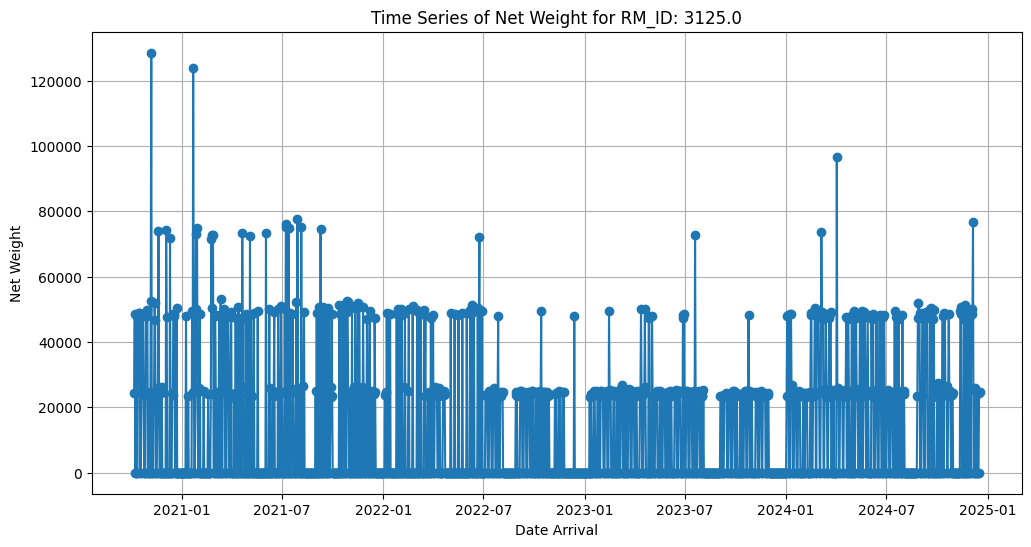

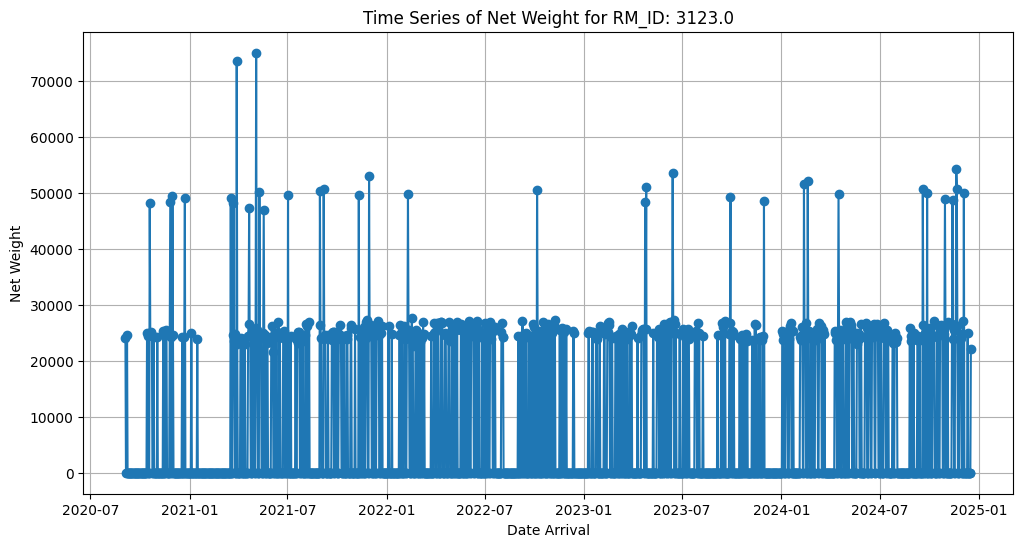

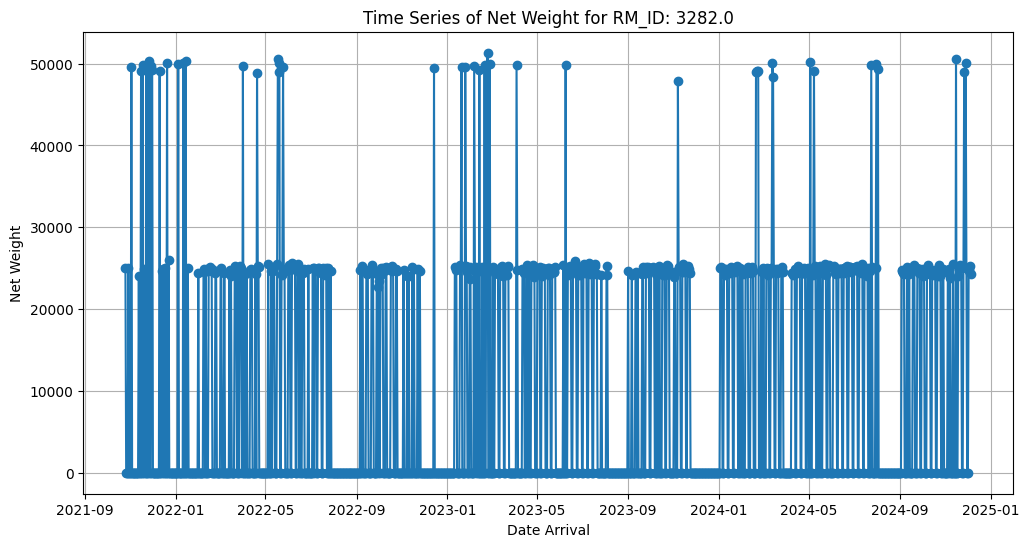

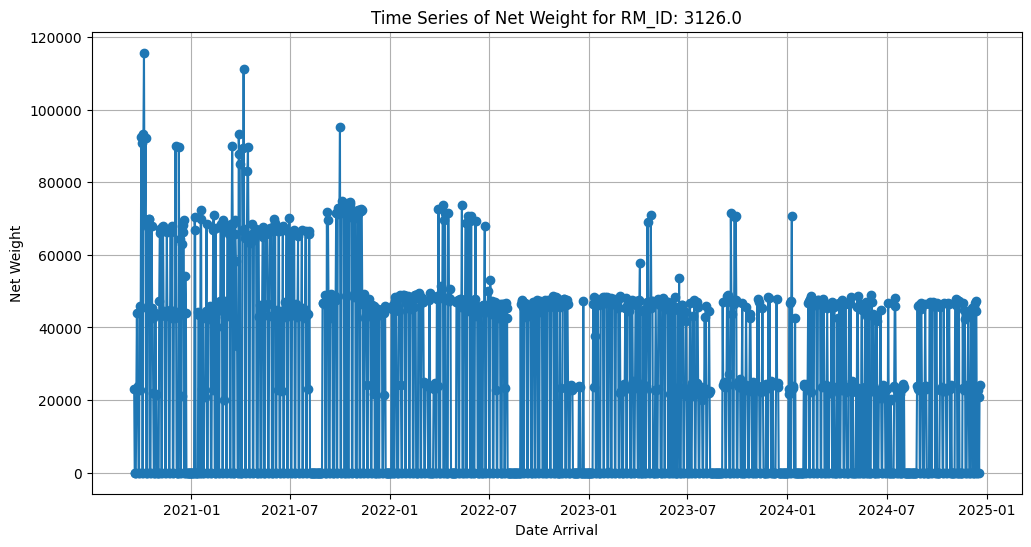

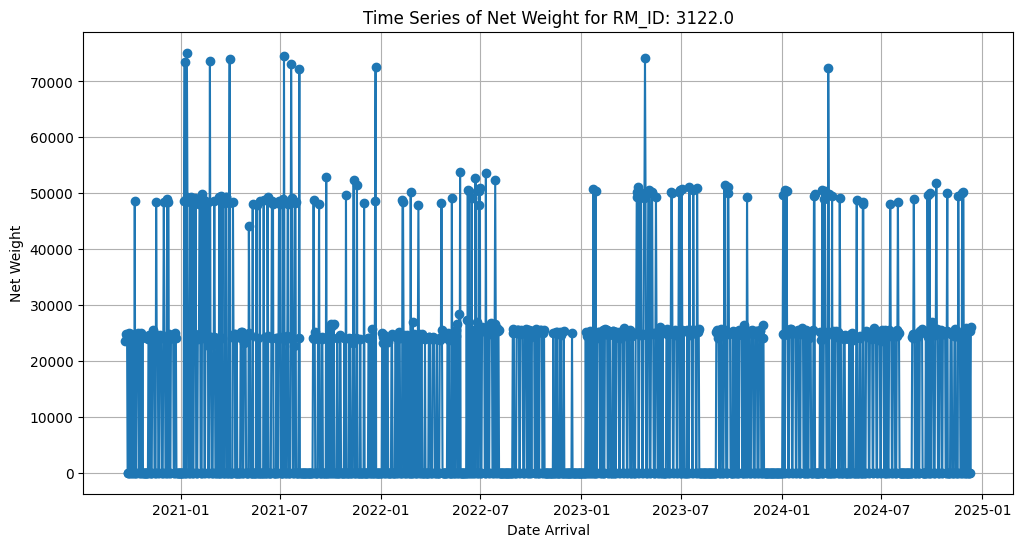

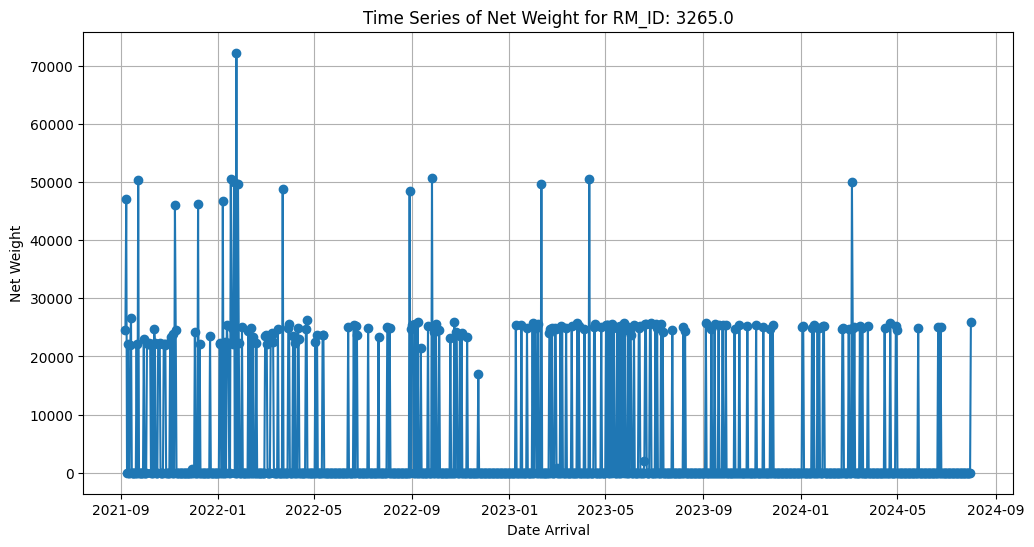

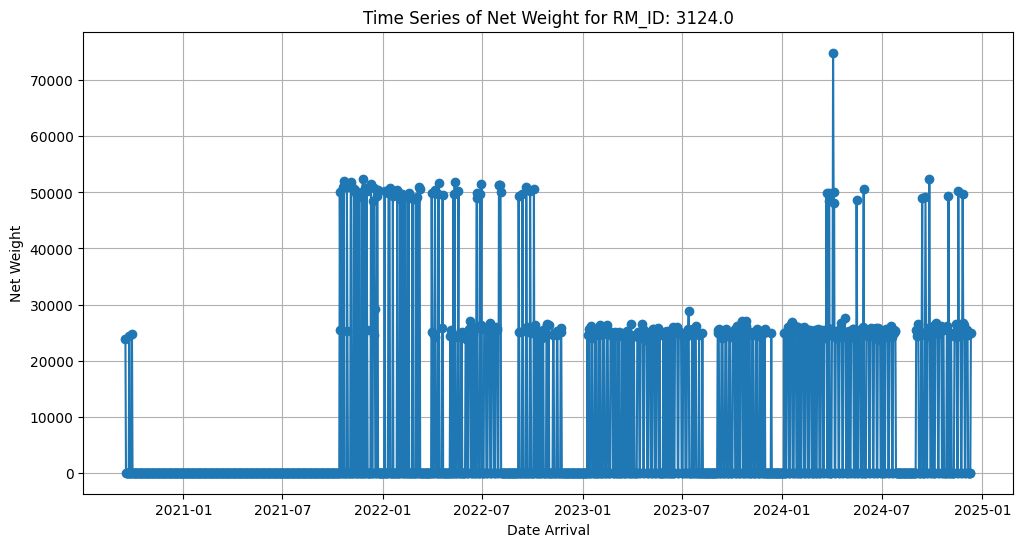

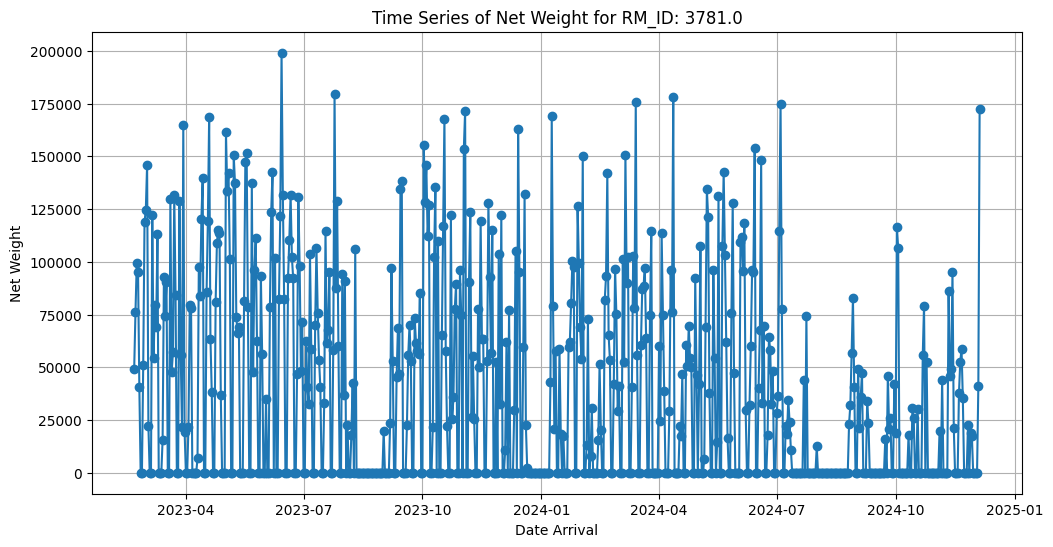

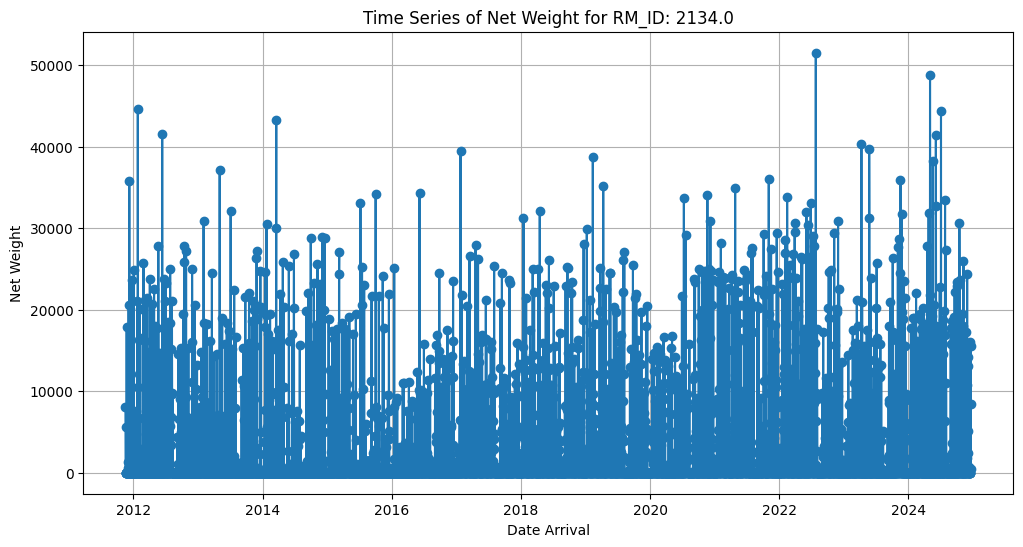

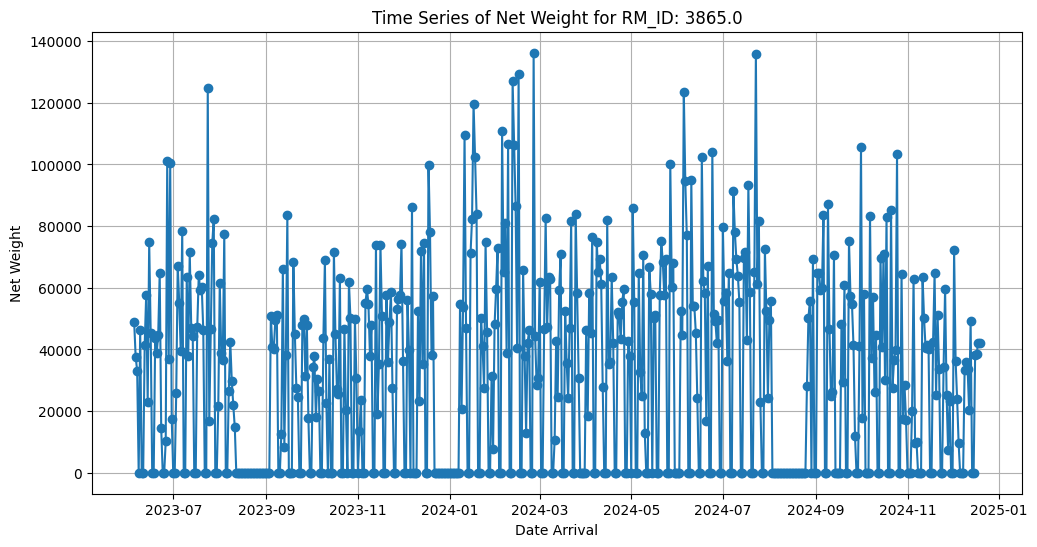

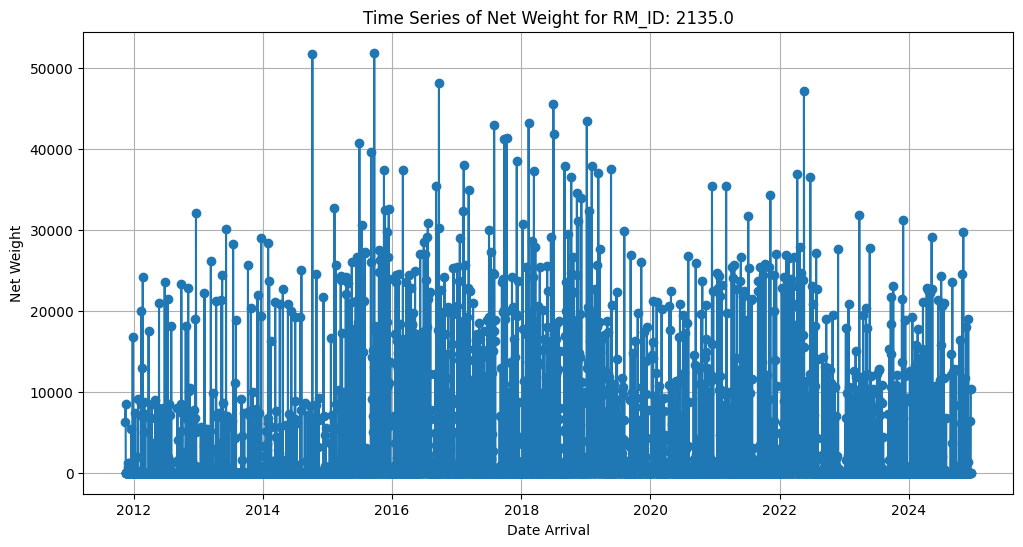

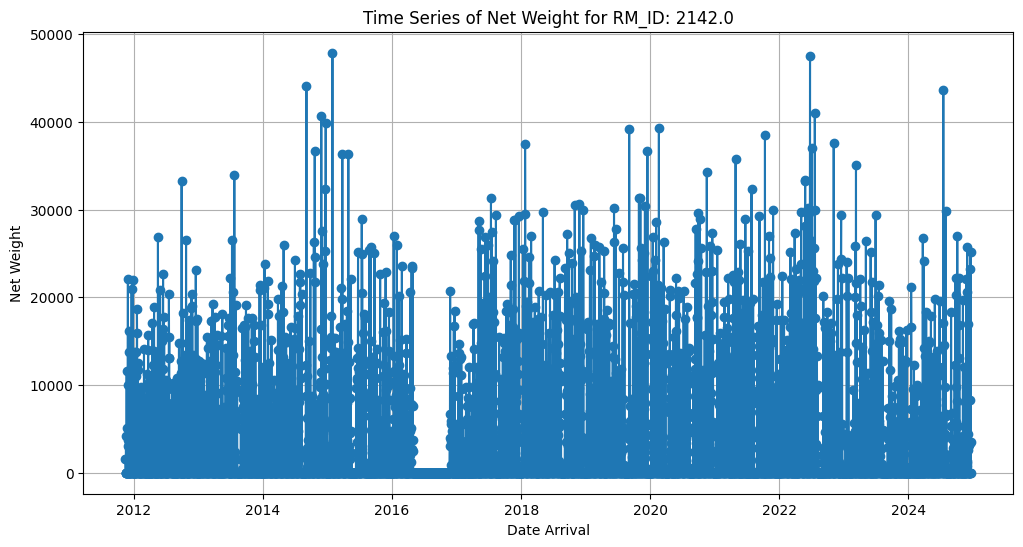

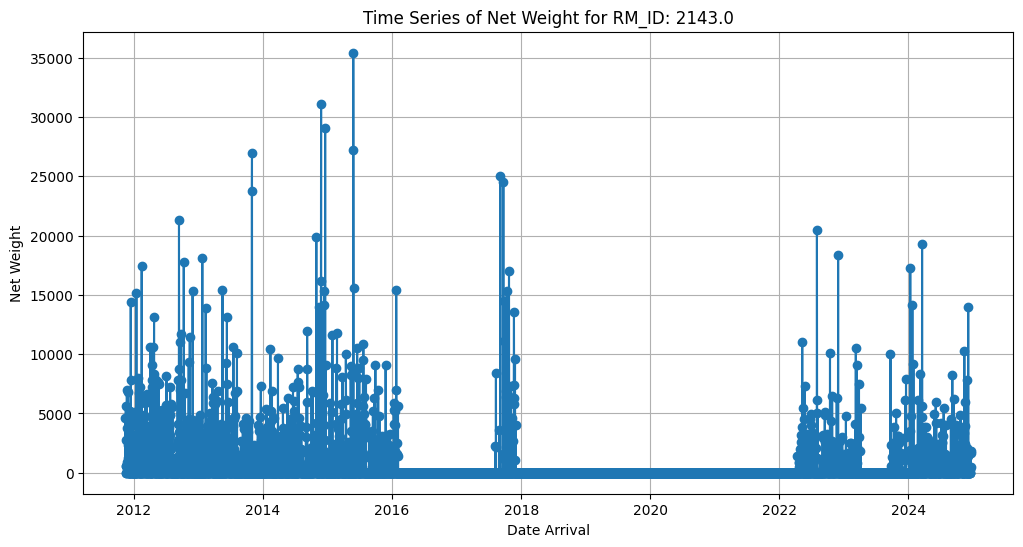

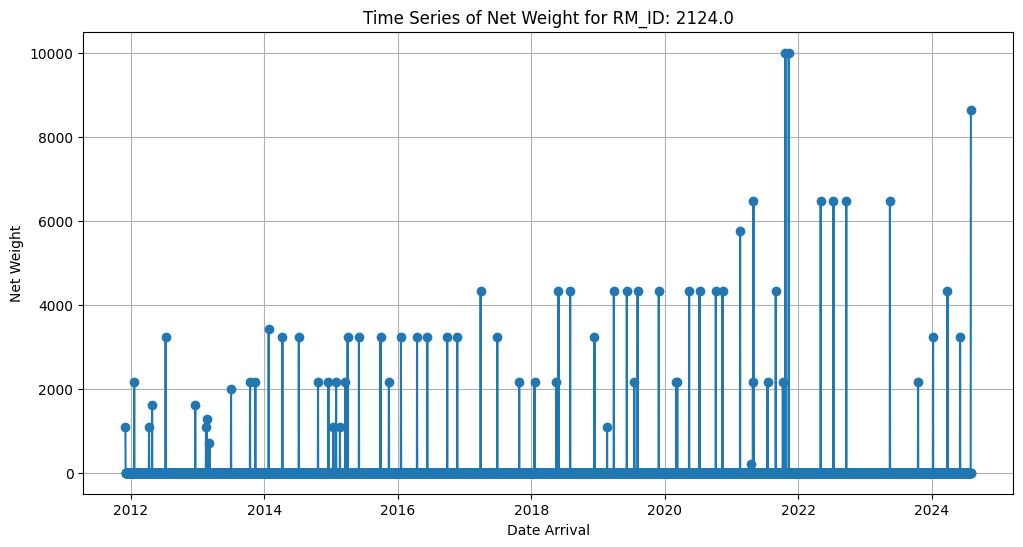

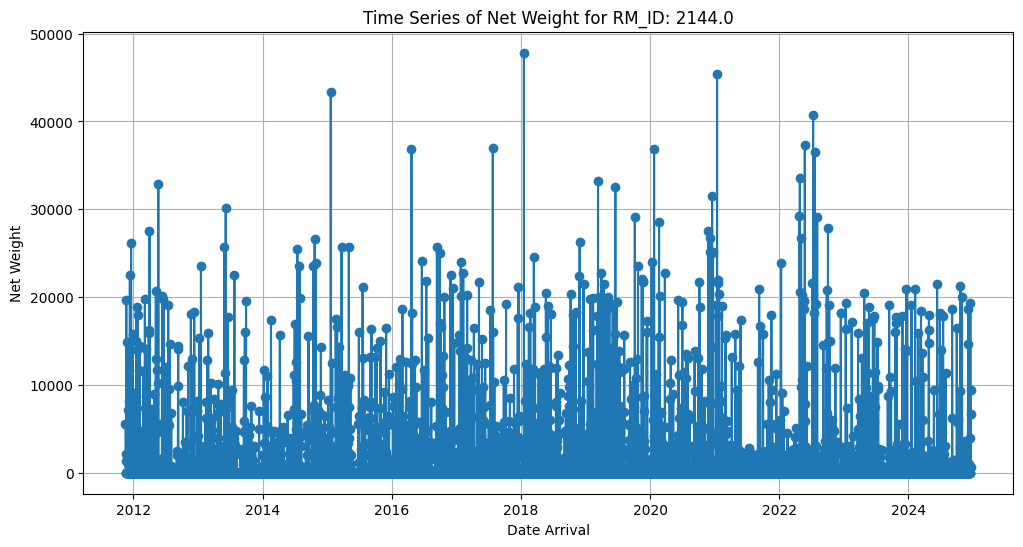

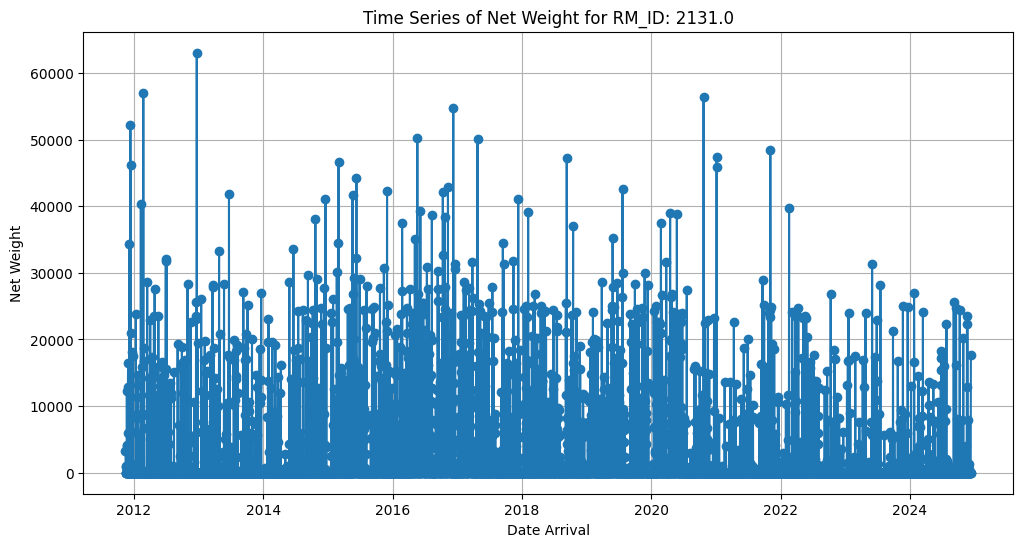

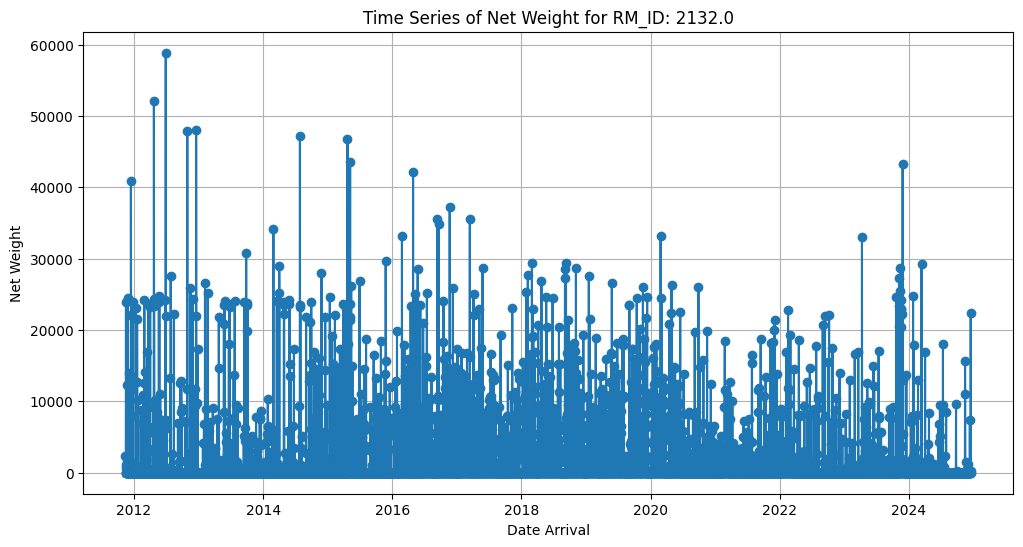

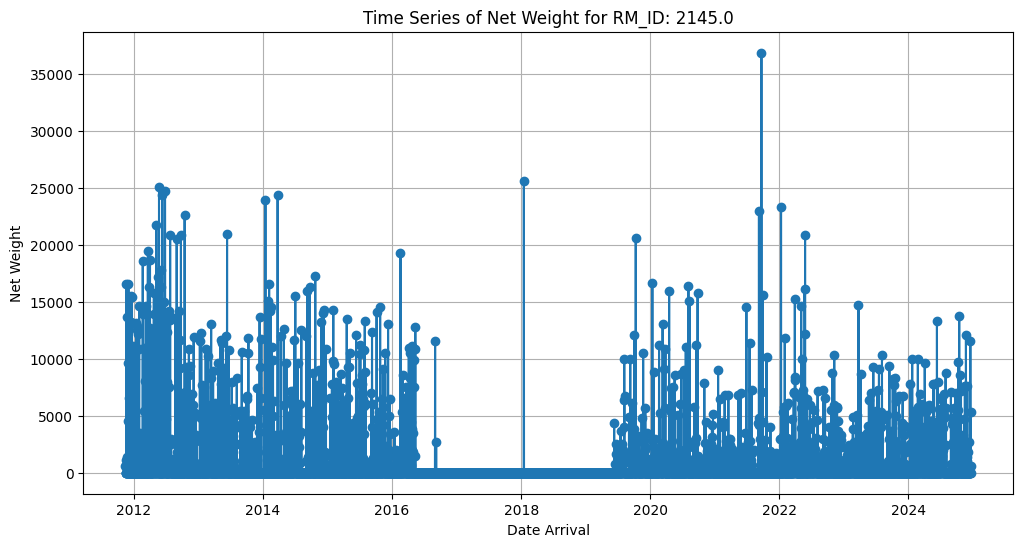

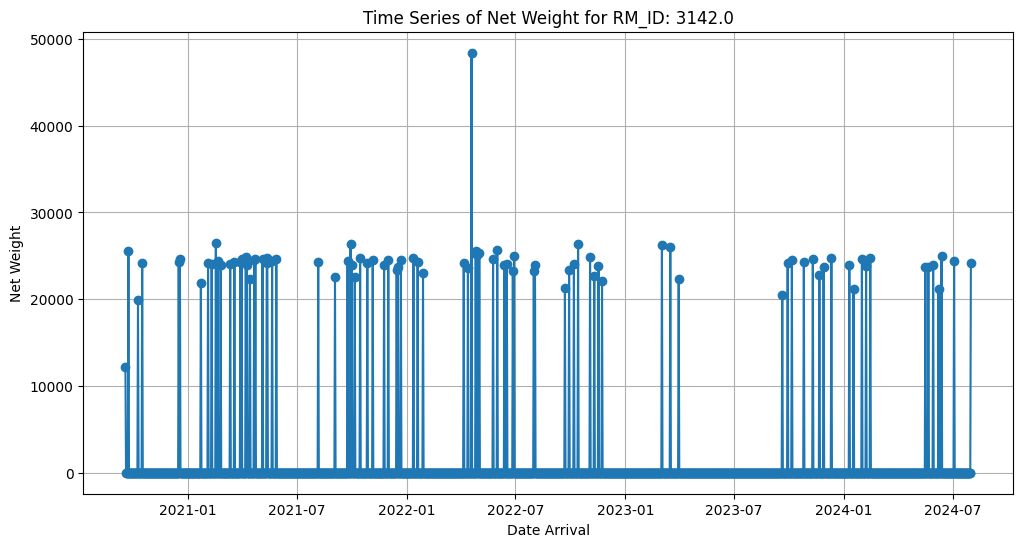

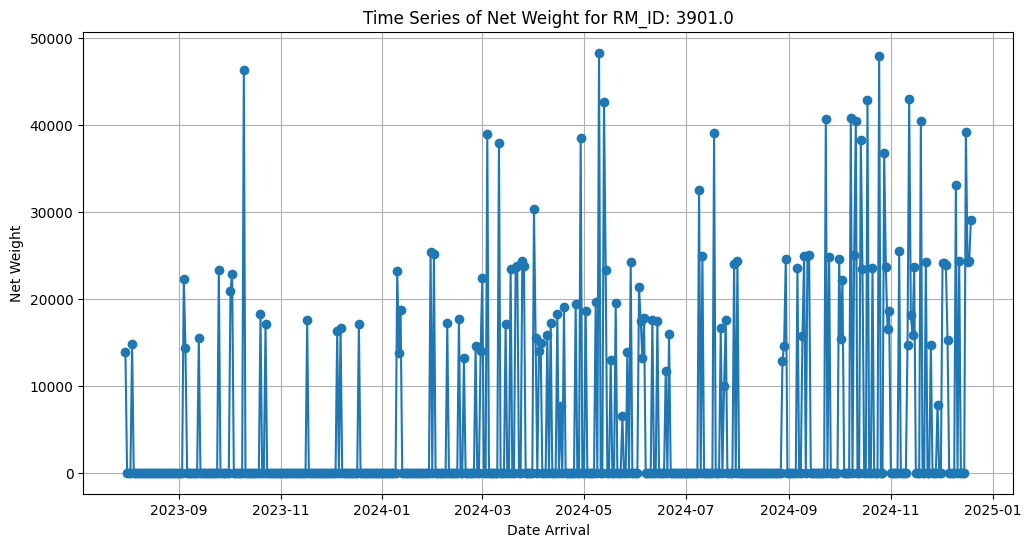

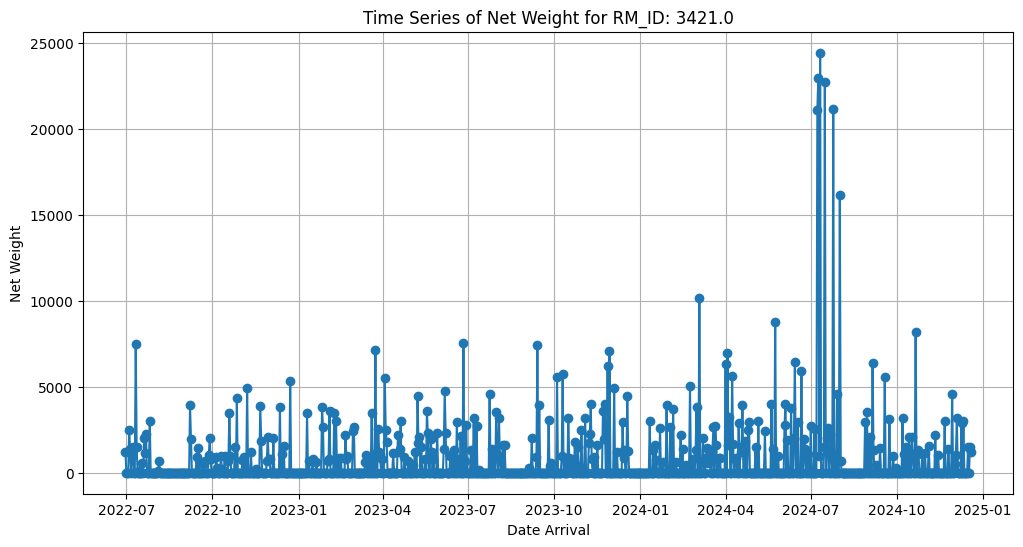

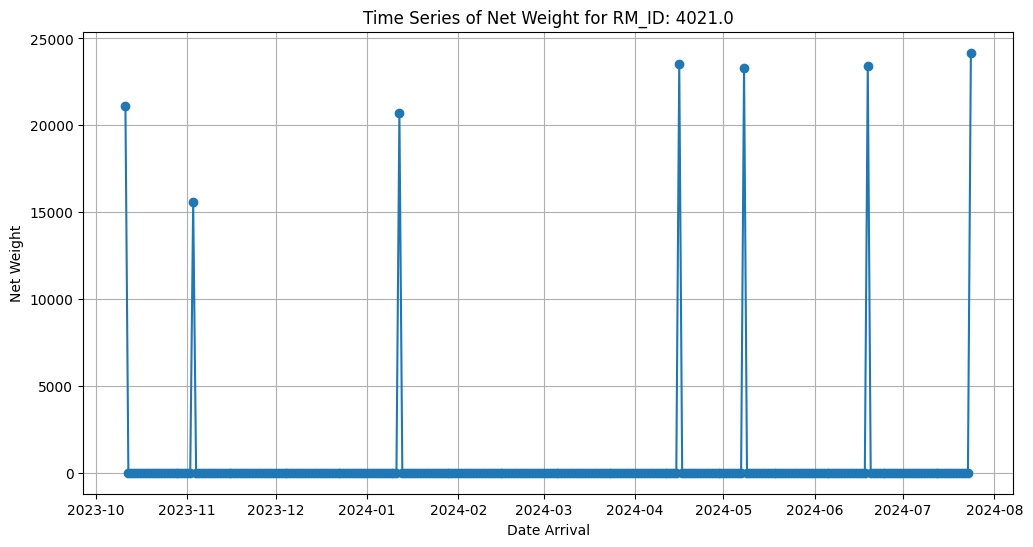

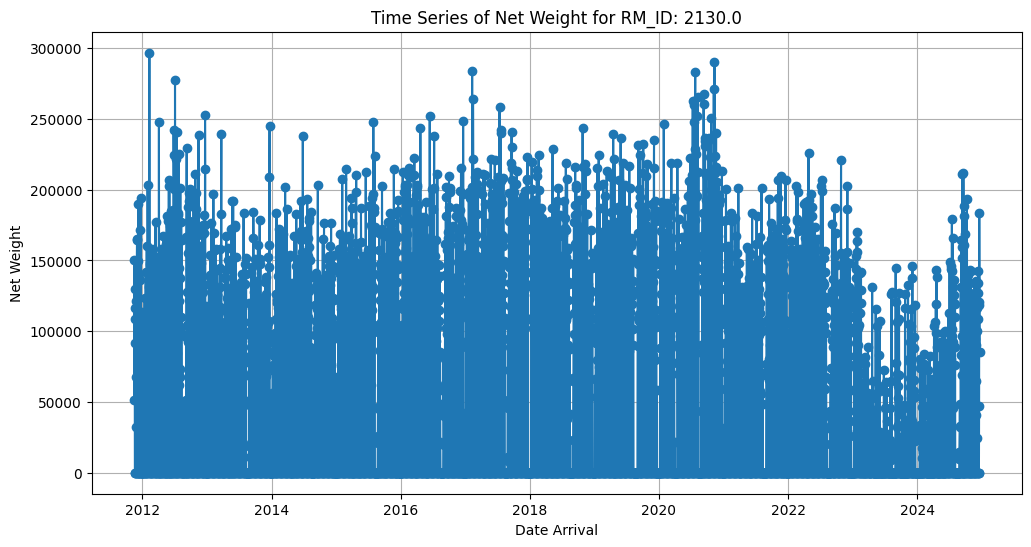

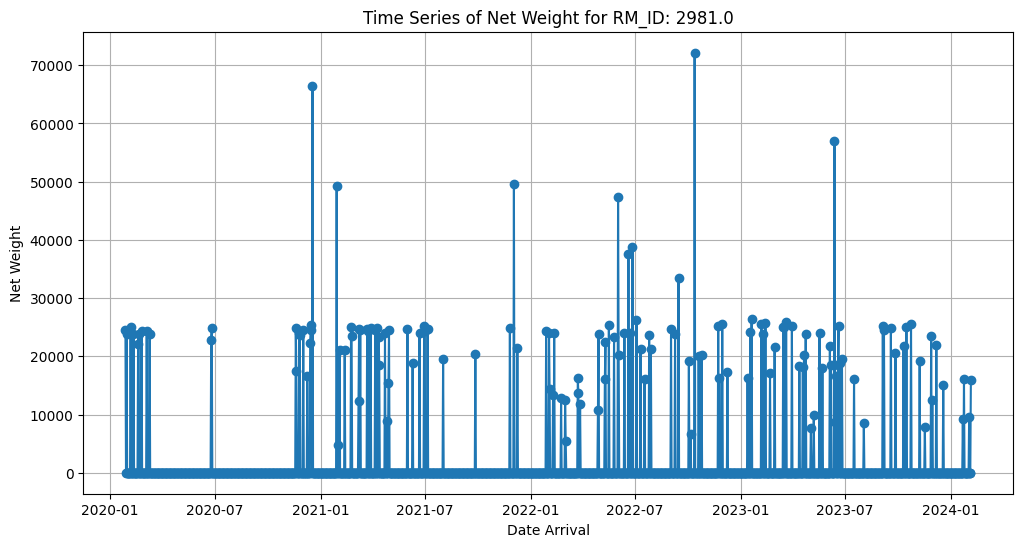

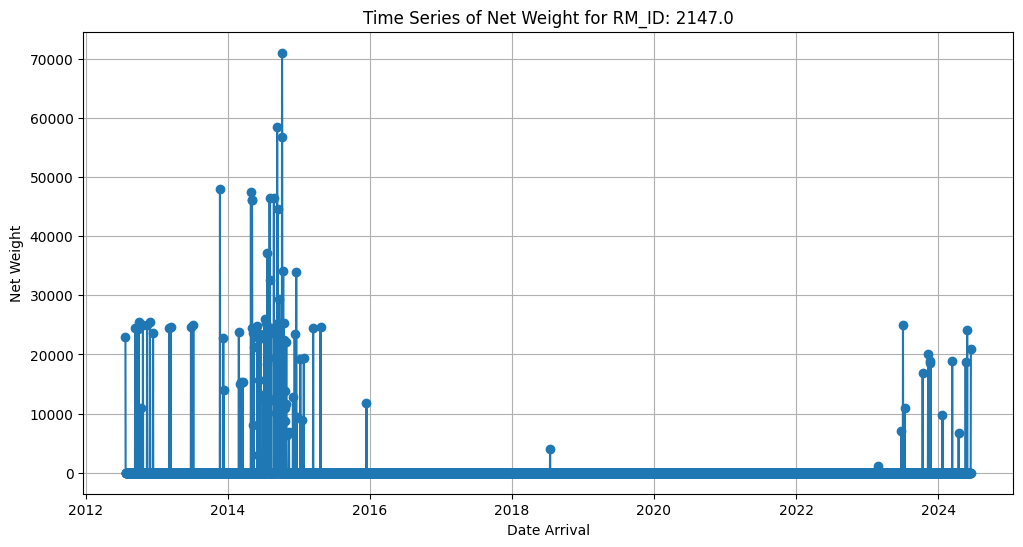

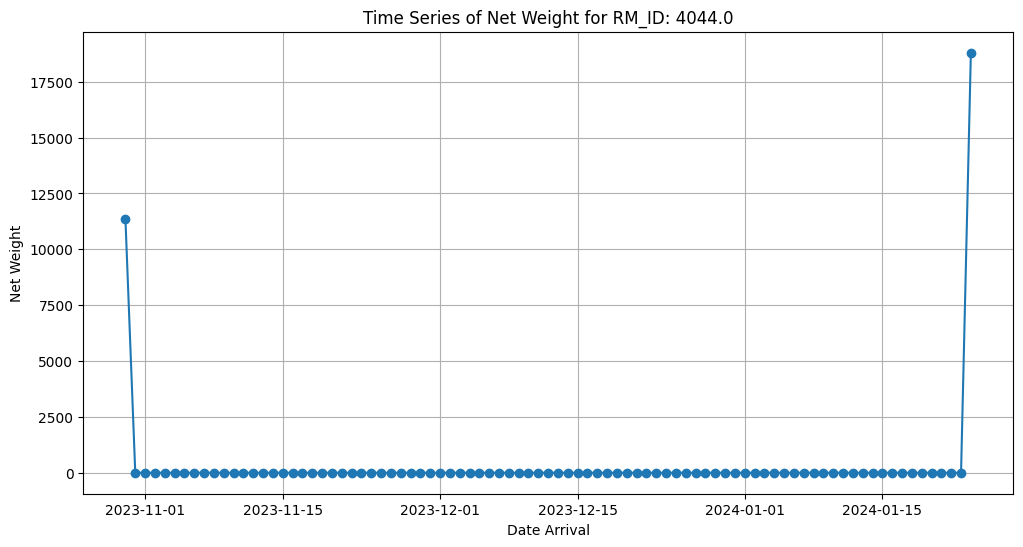

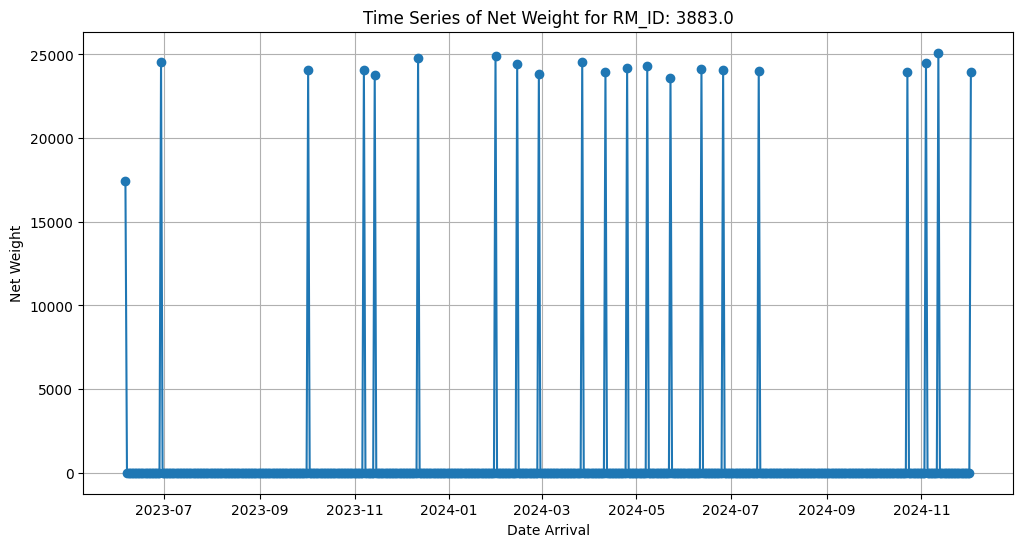

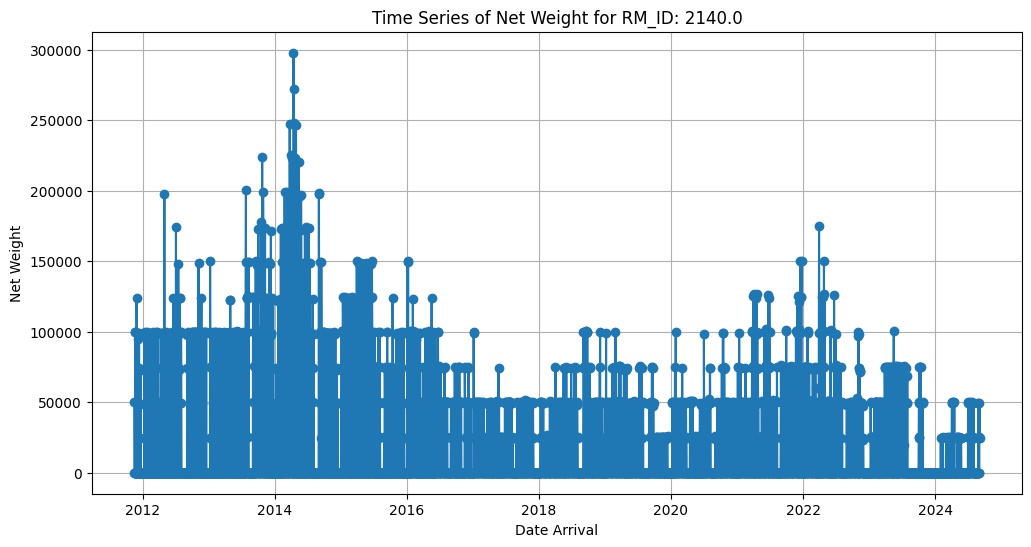

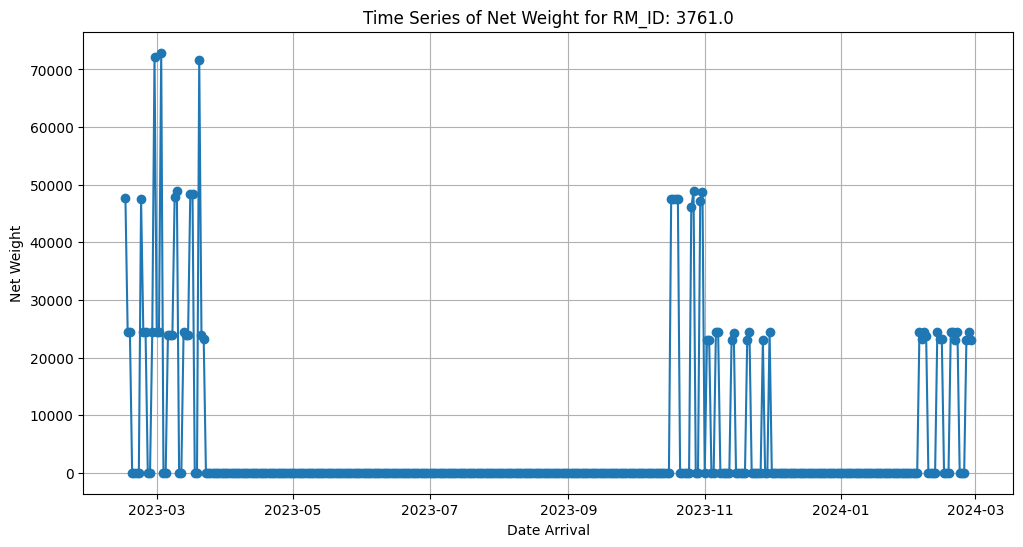

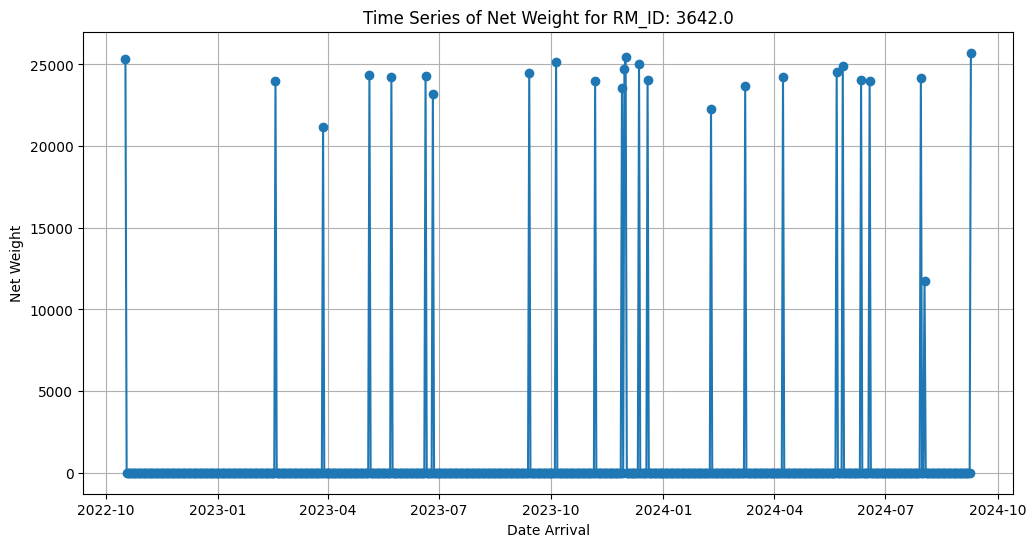

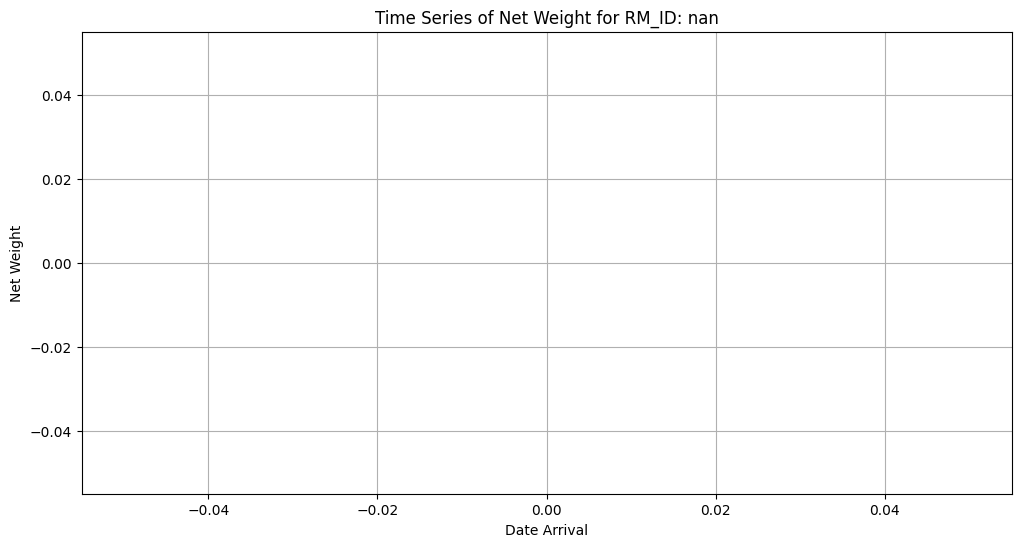

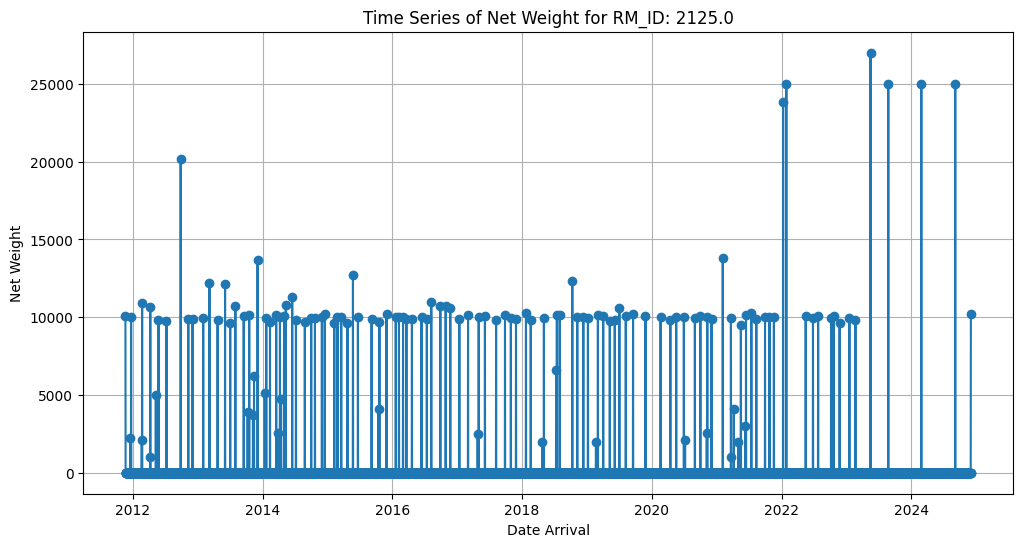

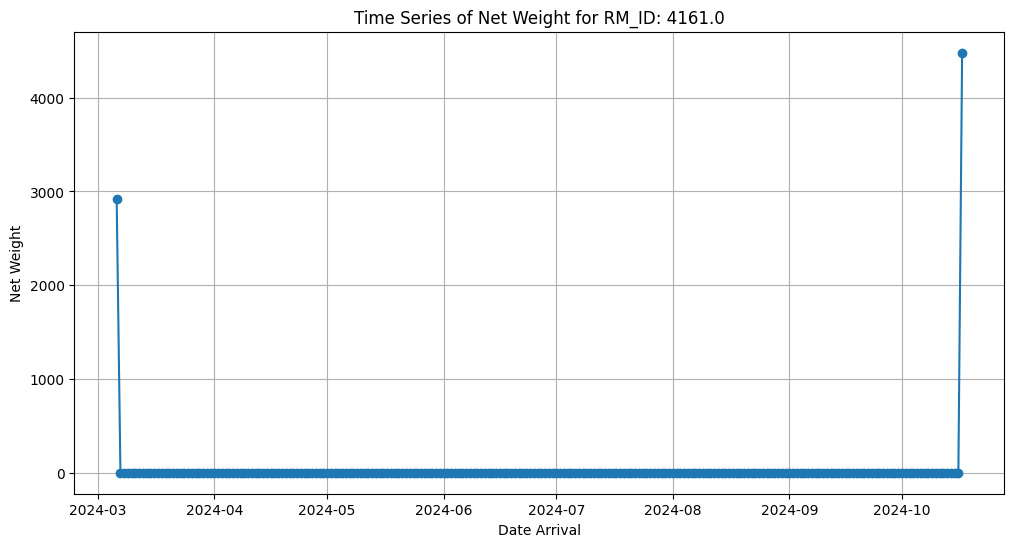

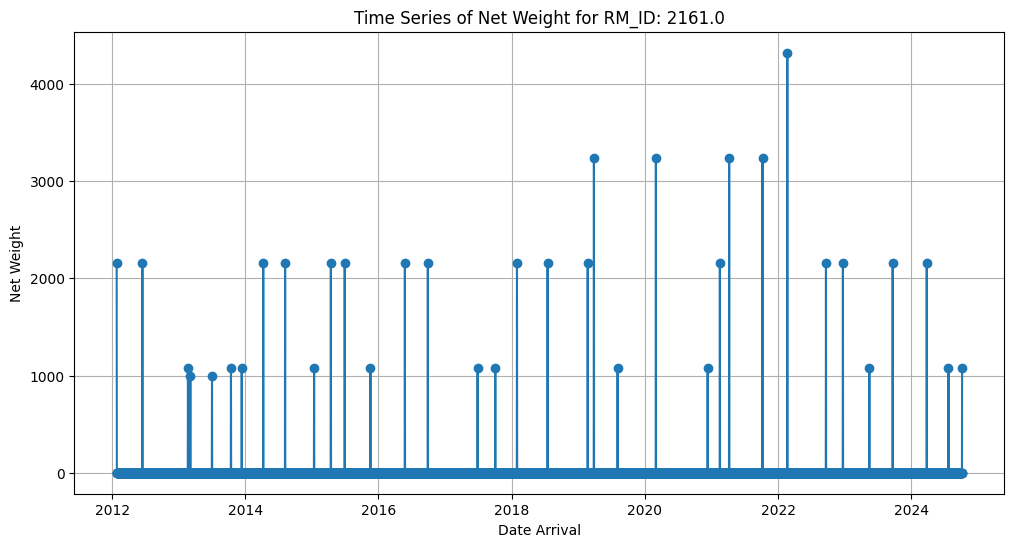

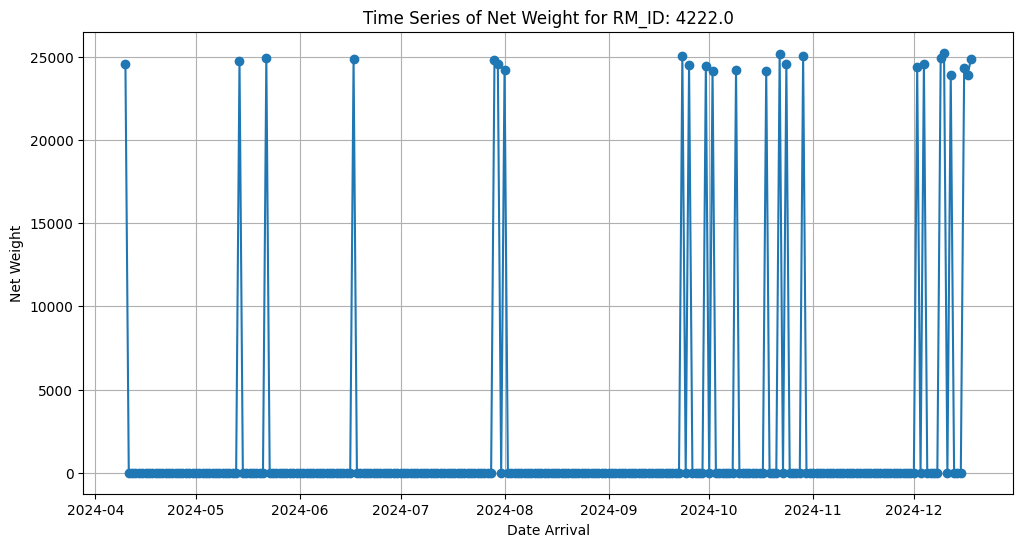

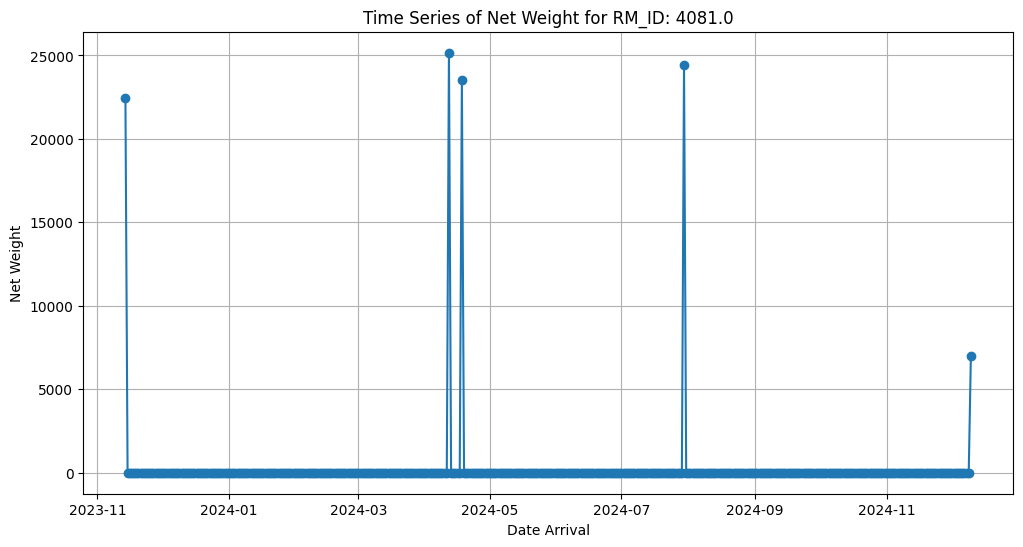

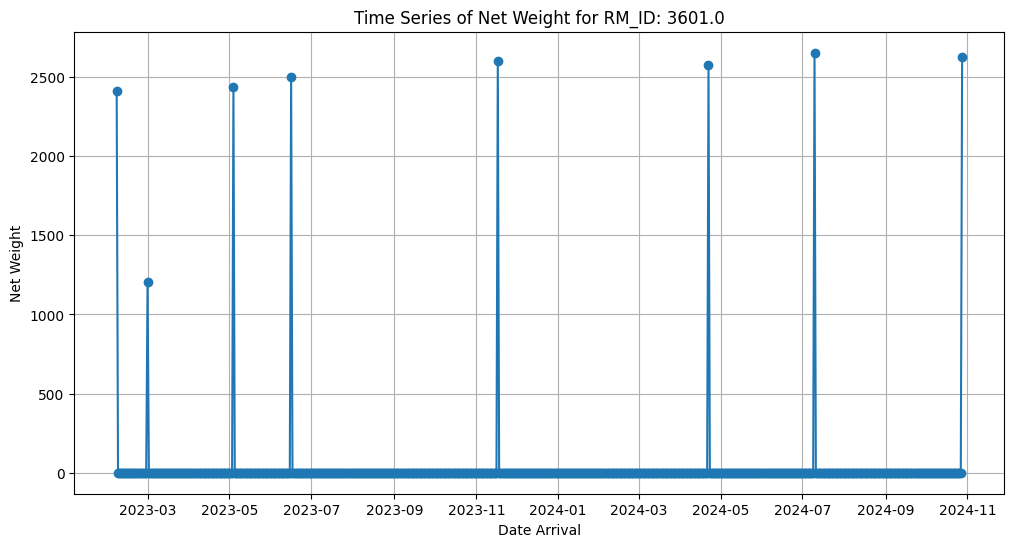

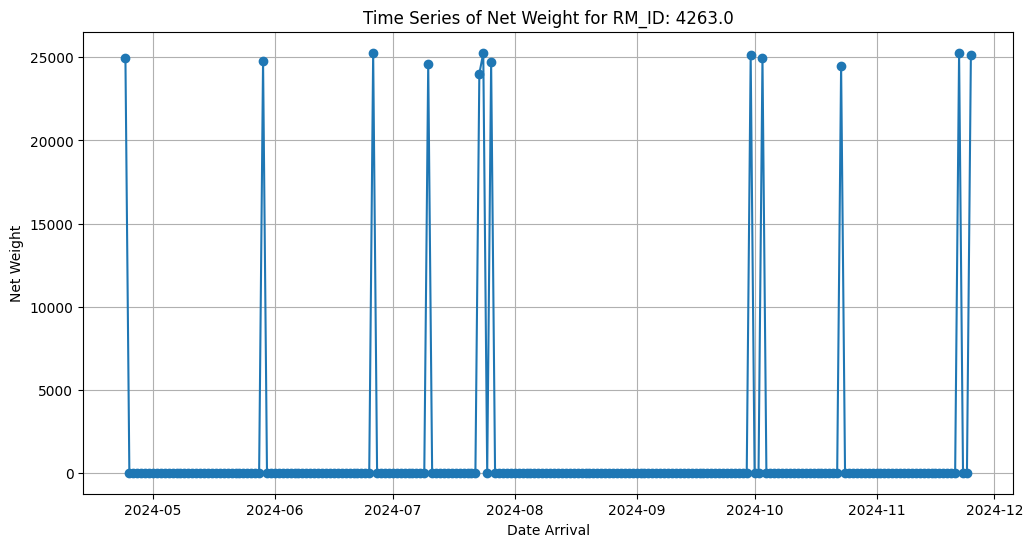

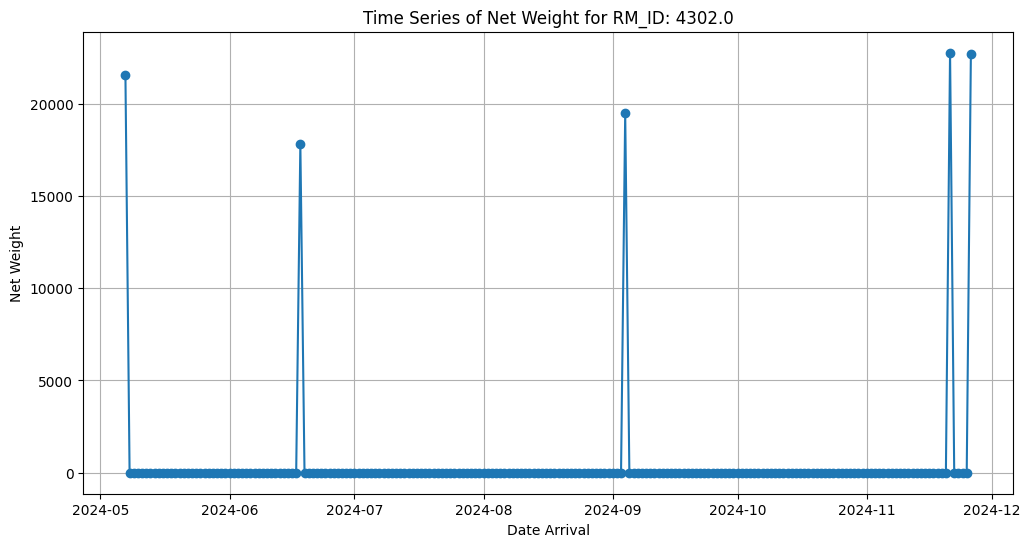

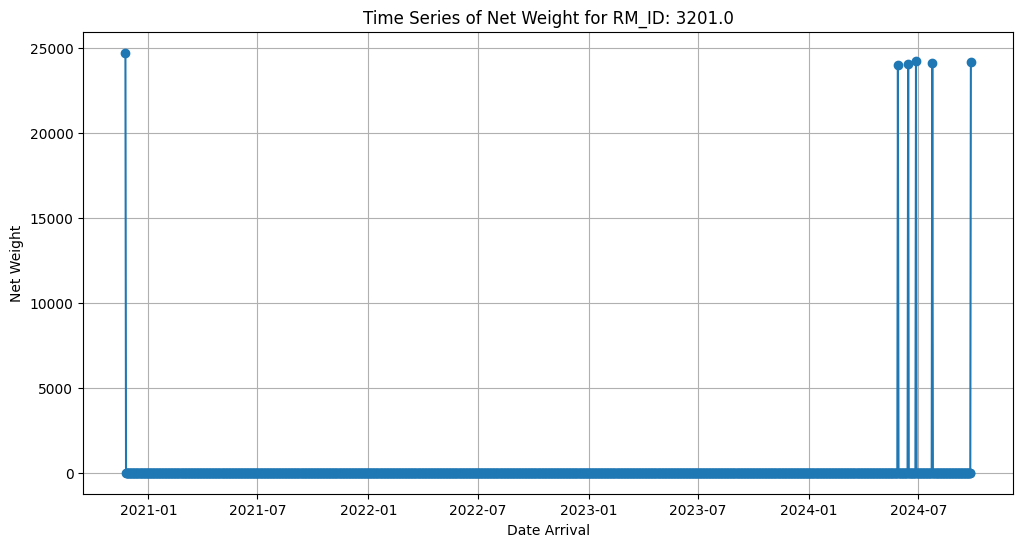

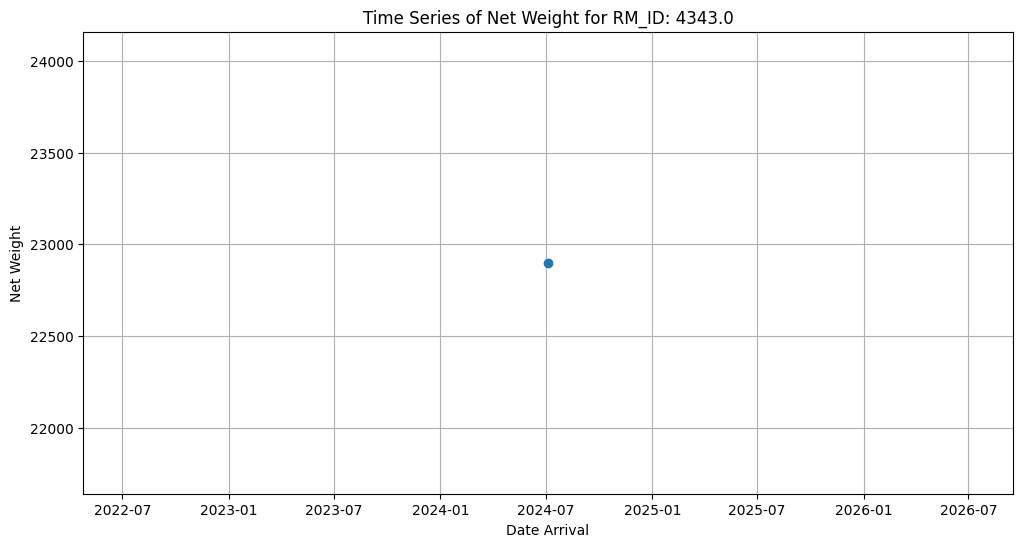

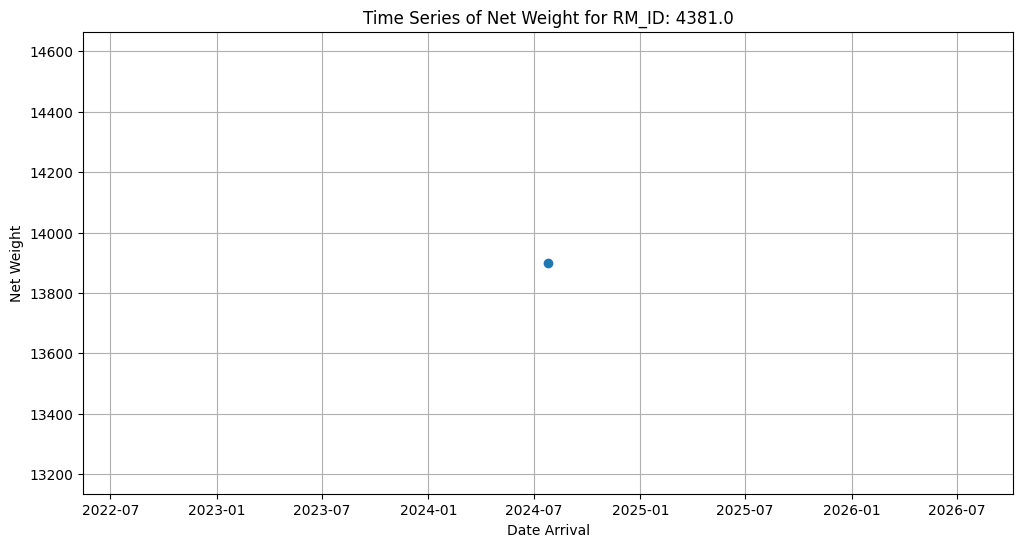

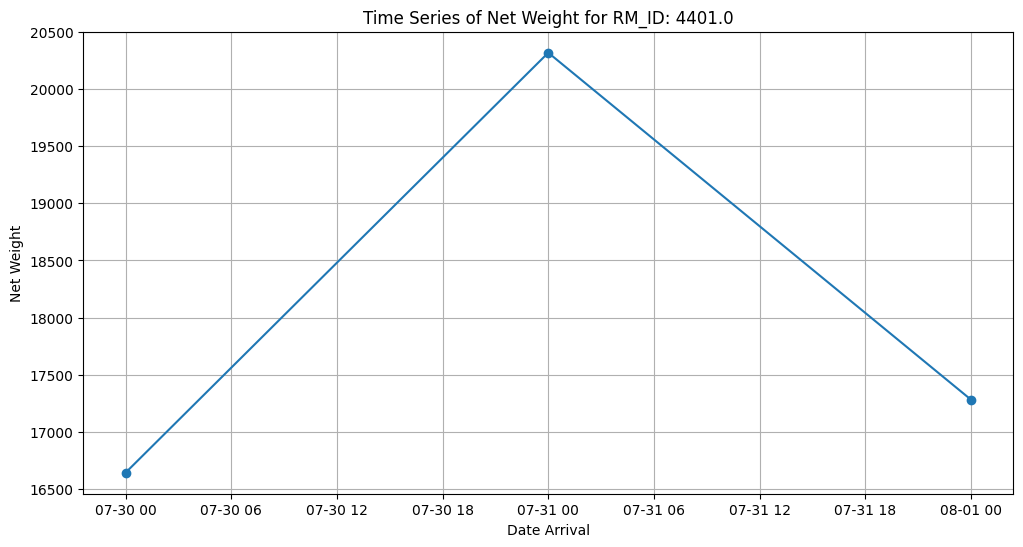

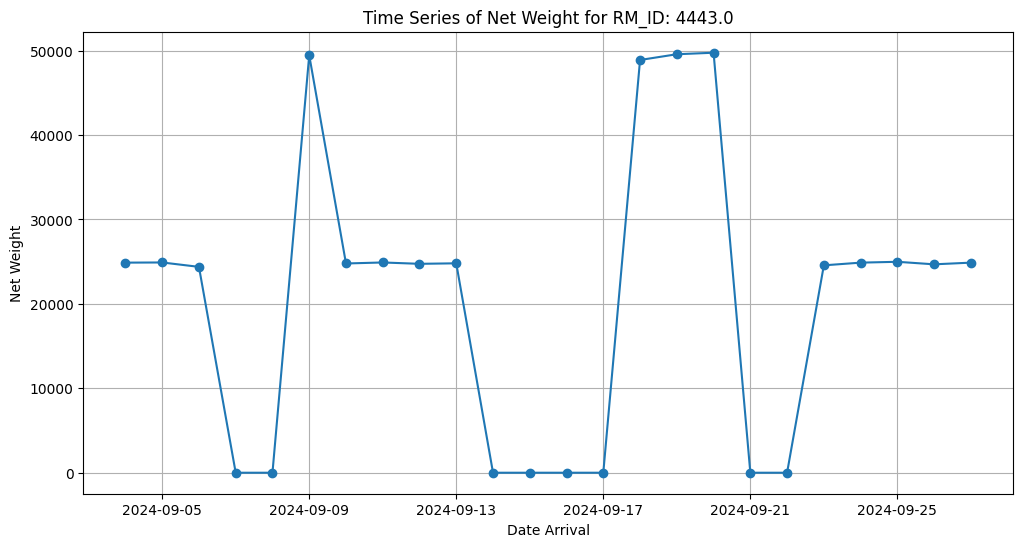

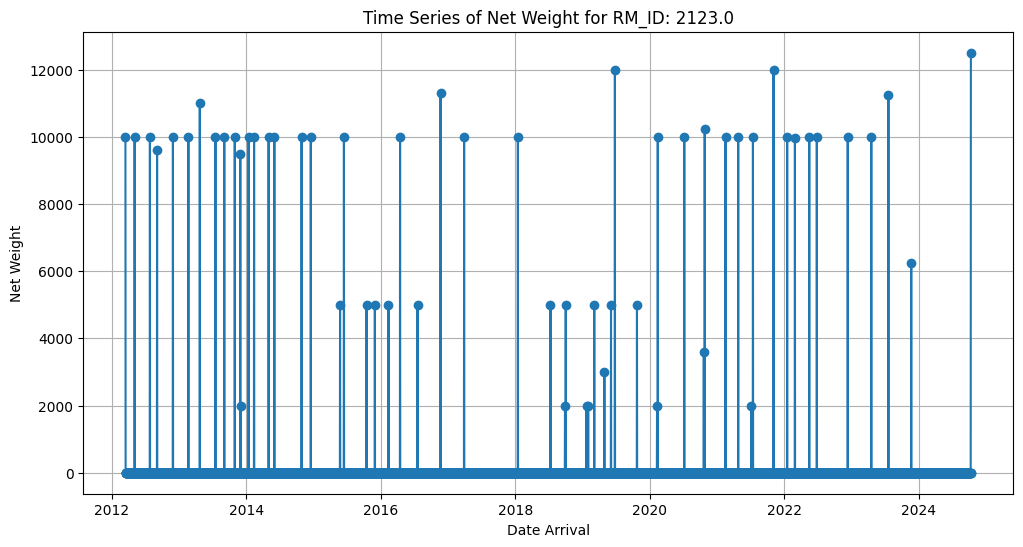

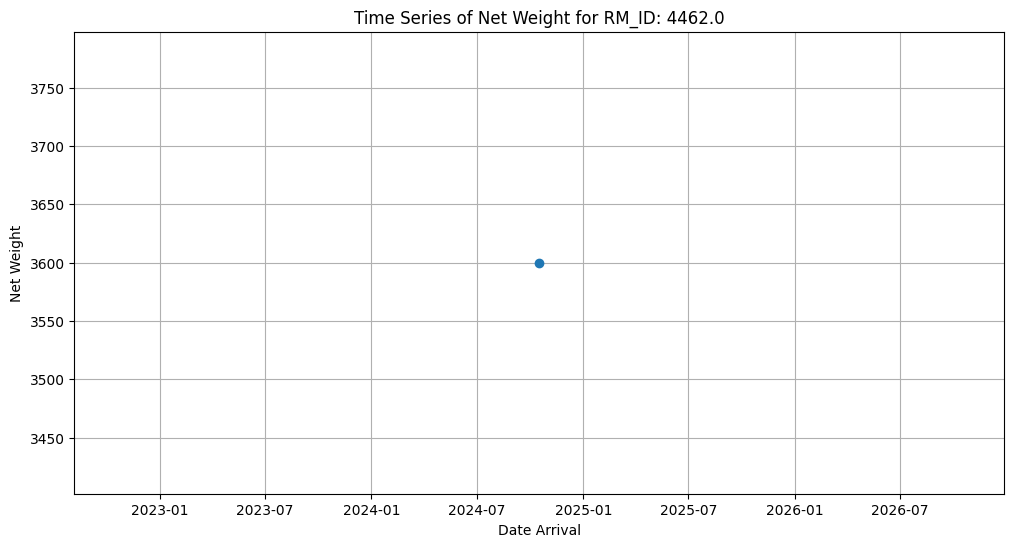

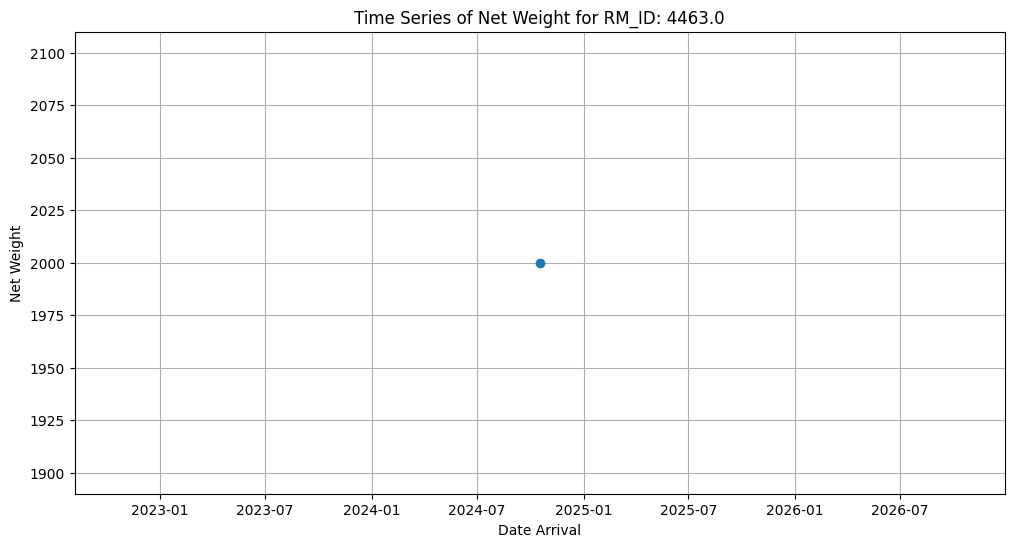

In [21]:
# For each of these rm_ids, I want to plot the time series
for rm_id in receivals[receivals['date_arrival'] >= '2024-01-01']['rm_id'].unique():
    plot_rm_id_time_series(rm_id)